In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [2]:
# load datasets
train_proc=pd.read_csv("train_proc.csv")
test_proc = pd.read_csv("test_proc.csv")

In [3]:
# splitting from training and validation data
X = train_proc.drop("Survived", axis =1)
y = train_proc['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,-0.551881,1,0,-0.726134,False,True,True,False,True,False,True,False,False
1,0.768879,1,0,2.353815,False,False,False,False,False,False,False,True,False
2,-0.221691,0,0,-0.693667,False,True,False,False,True,True,False,False,False
3,0.521236,1,0,1.479214,False,False,False,False,True,False,False,True,False
4,0.521236,0,0,-0.687655,False,True,True,False,True,False,True,False,False


In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
# comparing KNN score with neighbors 3,5 and 7
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.values.ravel())
knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train.values.ravel())
knn_7 = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train.values.ravel())

In [8]:
print(f'Score with neighbors 3 : train {knn_3.score(X_train,y_train)}, test {knn_3.score(X_test,y_test)}')
print(f'Score with neighbors 5 : train {knn_5.score(X_train,y_train)}, test {knn_5.score(X_test,y_test)}')
print(f'Score with neighbors 7 : train {knn_7.score(X_train,y_train)}, test {knn_7.score(X_test,y_test)}')

Score with neighbors 3 : train 0.891566265060241, test 0.7365269461077845
Score with neighbors 5 : train 0.8629518072289156, test 0.7724550898203593
Score with neighbors 7 : train 0.8644578313253012, test 0.7664670658682635


In [10]:
# finding optimised value for KNN neigbours hyper parameter
accuracy_rate = []
for i in range(3,40):     
    knn = KNeighborsClassifier(n_neighbors=i)
    cross_val_results=cross_val_score(knn,X_train, y_train.values.ravel(),cv=5)
    accuracy_rate.append(cross_val_results.mean())

Text(0, 0.5, 'Accuracy Rate')

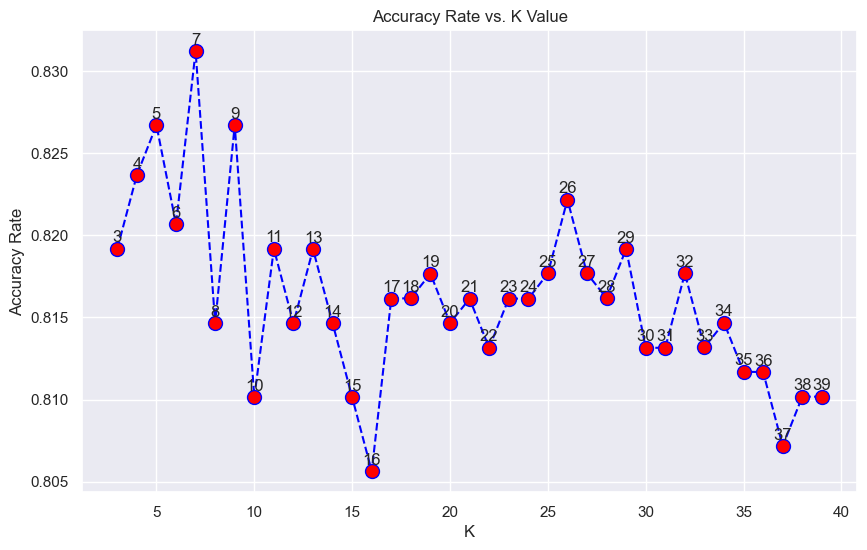

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(3,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
for x,y in zip(range(3,40), accuracy_rate): 
    plt.text(x, y+.0004, str(x),ha="center")
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [12]:
# predictions on validation set and accuracy with optimised model
knn_17 = KNeighborsClassifier(n_neighbors=17).fit(X_train,y_train.values.ravel())
predictions = knn_17.predict(X_test)
print(accuracy_score(y_test,predictions))

[1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1]
0.7844311377245509


In [13]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
confusion_matrix(y_test,predictions)

array([[90, 18],
       [18, 41]], dtype=int64)

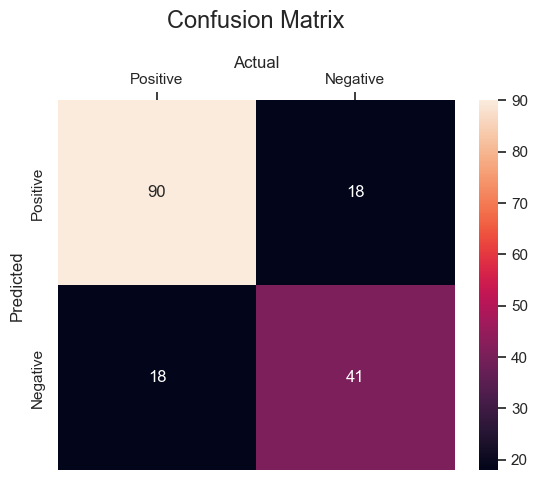

In [14]:
import seaborn as sns
sns.heatmap(cm, 
            annot=True,
            fmt="d", 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Predicted')
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.xlabel('Actual')
plt.show()

In [16]:
# roc-auc curve
y_pred_prob = knn_17.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,threshold=roc_curve(y_test,y_pred_prob)
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(roc_auc_dt)

[0.         0.         0.01851852 0.0462963  0.0462963  0.05555556
 0.05555556 0.07407407 0.12037037 0.16666667 0.22222222 0.25925926
 0.27777778 0.32407407 0.35185185 0.55555556 0.7037037  0.90740741
 1.        ]
[0.         0.08474576 0.30508475 0.40677966 0.44067797 0.47457627
 0.52542373 0.61016949 0.66101695 0.69491525 0.72881356 0.76271186
 0.77966102 0.77966102 0.79661017 0.81355932 0.89830508 0.91525424
 1.        ]
[       inf 1.         0.94117647 0.88235294 0.82352941 0.76470588
 0.70588235 0.64705882 0.58823529 0.52941176 0.47058824 0.41176471
 0.35294118 0.29411765 0.23529412 0.17647059 0.11764706 0.05882353
 0.        ]
0.7926867545511613


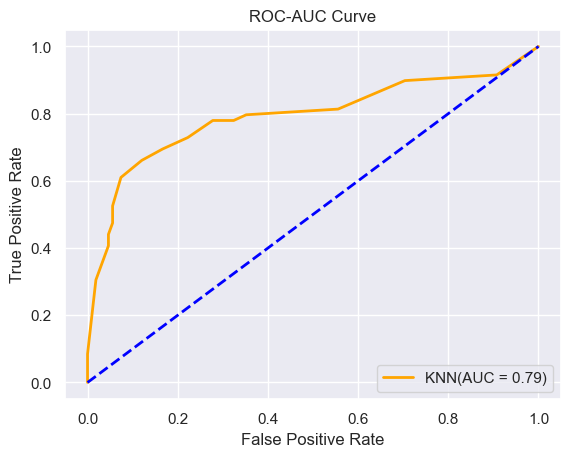

In [18]:
plt.figure()
plt.plot(fpr_dt,tpr_dt,color='orange',lw=2,label=f'KNN(AUC = {roc_auc_dt:.2f})')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')

In [19]:
# classification report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       108
           1       0.69      0.69      0.69        59

    accuracy                           0.78       167
   macro avg       0.76      0.76      0.76       167
weighted avg       0.78      0.78      0.78       167



In [20]:
# predictions on test data
predictions = knn_17.predict(test_proc)

# creating dataframe of test predictions with Passenger Id, uncomment after loading test file with Passenger Id
# prediction_df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})

# Save the predictions to a CSV file, uncomment to save file
# prediction_df.to_csv('prediction.csv', index=False)